# COMPUTER VISION AND PATTERN RECOGNITION PROJECT
## Alessandro Cesa

In [10]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import copy

In [ ]:
!wget -c https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa/archive/main.zip
!unzip main.zip

In [11]:
train_path = "Computer_Vision_Project_Cesa-main/CVPR2023_project_2_and_3_data/train"
test_path = "Computer_Vision_Project_Cesa-main/CVPR2023_project_2_and_3_data/test"

In [14]:
transform=transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor()])

In [15]:
train=ImageFolder(root=train_path,transform=transform)
test=ImageFolder(root=test_path,transform=transform)

In [16]:
# check the dataset size
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(train.classes)

Train size: 1500
Test size: 2985
['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


label: 0
class: Bedroom


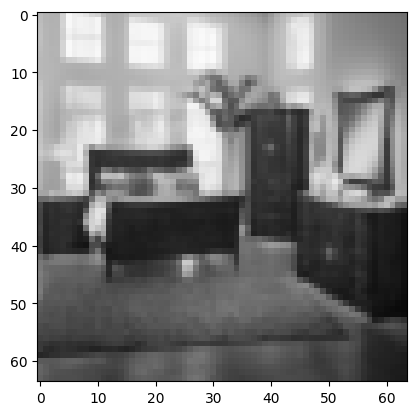

In [18]:
# get image no. 1 and its label
index=1
img,label=train[index]

print(f"label: {label}")

print("class: " + train.classes[label])
# display
figure = plt.figure()
plt.imshow(img.numpy().transpose((1, 2, 0))) #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)

In [19]:
# Create data loaders.
# Data loaders are basically objects that make easy to iterate through the data by batches of some batch_size

batch_size = 32
train_loader = DataLoader(train, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False)

for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

# get a batch from the training set
dataiter = iter(train_loader)
images, labels = next(dataiter)   #images is a (batch_size,3,32,32) tensor

print(images.size())

Shape of X [N, C, H, W]: torch.Size([32, 3, 64, 64])
Shape of y: torch.Size([32]) torch.int64
torch.Size([32, 3, 64, 64])


torch.Size([32, 3, 64, 64])
Store OpenCountry Highway Office Industrial Kitchen LivingRoom Coast Industrial Office Kitchen Street Bedroom LivingRoom LivingRoom Coast LivingRoom Store Forest InsideCity Mountain Suburb Industrial Store TallBuilding Highway Kitchen Coast OpenCountry Office Mountain TallBuilding


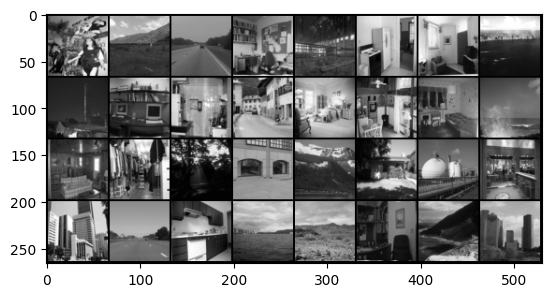

In [20]:
classes=train.classes

# get a batch from the training set
dataiter = iter(train_loader)
images, labels = next(dataiter)   #images is a (batch_size,3,32,32) tensor

print(images.size())

img=torchvision.utils.make_grid(images)
figure = plt.figure()
plt.imshow(img.numpy().transpose((1, 2, 0))) #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [21]:
!git status

fatal: not a git repository (or any of the parent directories): .git
